  ## 1. Introduction

* Project

We aim to develop Python-based data analysis software The goal is to develop software that can analyze Micro Led data in detail.

## 2. Project information
 
    
* **Detailed project**
    
  At first,

  The main task is to receive data from the customer and then receive the request.
 
  Main request 
  + Wafer
  + Die row & colum
  + option
 
  We can analyze the selected data by specifying specific elements In order to develop such analysis software, a black box(software) that implments this function is created to solve the customer's request.

  In the software,
  * We process the raw data and print it out. 
  * We show the processed data as a figure and save the file. 
 
 **You can selectively output only the graph you want.**
 
  Please put the data in the 'dat' folder
  specify the file path
  Run the run.py 

* **Run file description** 

   Data is processed by selecting only files in "dat"
   
   Load the module that processes and fits raw data and the module that makes the data parsed from accel, respectively.

## 3. Install and Run 

 * Getting Stared
    + Entered the Terminal, write down 'pip install -r requirements.txt' and download it. \
 ``pip install -r requirements.txt``


 * How to Run
   + Choose the raw data folder customer want to analyze.


## 4. Description of the module file feature


 ### 1) Fitting module 
 
   * The graph is drawn by parsing the raw data of PL data, EL data in the Accel file.
   * The fitting of parsing a raw data and displays the data value y-axis corresponding to x-axis and stored in the graph to visualize the image.

## 5. Example of analysis result

In [1]:
import os

os.chdir('../')
print(os.getcwd())

C:\Users\ASDL\Desktop\micro_led_analysis


  ❗caution❗
>
> If an error occurs, please refresh the jupyter notebook or restart the kernel 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [23]:
df = pd.read_excel('./dat/Ver6.xlsx')  # excel file 불러오기
df.drop(['No',' X Index',' Y Index',' X Size',' Y Size'],axis=1,inplace=True) #불필요한 column 지우기
df['PL JudgeType'].unique()  # PL JudgeType을 고유값으로 설정
for i in range(0,7590):
    if df.loc[i,'PL JudgeType'] == 'PL OK': # PL JudgeType를 1과 0으로 치환
        df.loc[i,'PL JudgeType'] = 1
    else:
        df.loc[i,'PL JudgeType'] = 0

for i in range(0,7590):                   # Itself Judge를 1과 0으로 치환
    if df.loc[i,'Itself Judge'] == 'EL OK':
        df.loc[i,'Itself Judge'] = 1
        df.loc[i,'Error flag'] = 'No error' # Ok일 경우 Error Flag column에 No error를 출력
    else:
        df.loc[i,'Error flag'] = df.loc[i,'Itself Judge'] # Error 발생 시 Effor flage에 Error 문구 출력
        df.loc[i,'Itself Judge'] = 0

df.to_excel('./dat/Ver6_substitution.xlsx') # 치환된 excel 파일 저장

In [38]:
df_1 = pd.read_excel('./dat/Ver6_substitution.xlsx') # 치화된 excel 파일 불러오기
df_1.drop(['Unnamed: 0',' PL_Min Value','Error flag'],axis=1,inplace=True) #불필요한 column 지우기
df_1['PL JudgeType'].unique()   # PL JudgeType을 고유값으로 설정

array([1, 0], dtype=int64)

In [36]:
df_1.corr() # 각 Column 별 상관관계 파악

,PL JudgeType,PL_Sum,PL_Average,PL_Max Value,EL_PW,EL_PI,EL_DW,EL_II,EL_FWHM,EL_IR(A),EL_VR(V),EL_VF1(V),EL_VF2(V),EL_VF3(V),EL_PO-Top(W),Itself Judge
PL JudgeType,1.000000,0.221748,0.217961,0.316268,0.091623,0.086054,0.011777,0.071894,0.098022,0.428941,0.008965,-0.007796,-0.004805,-0.002067,0.125642,0.109088
PL_Sum,0.221748,1.000000,0.988944,0.872823,-0.076567,-0.061167,-0.038001,-0.017079,-0.013838,0.229400,-0.092440,0.178227,0.180804,0.161638,0.119837,-0.093483
PL_Average,0.217961,0.988944,1.000000,0.861703,-0.075193,-0.060099,-0.035753,-0.015862,-0.013066,0.228208,-0.088929,0.176178,0.179227,0.160318,0.116901,-0.093022
PL_Max Value,0.316268,0.872823,0.861703,1.000000,-0.033593,-0.004186,-0.025751,0.045088,0.049945,0.294392,-0.093397,0.133408,0.136986,0.119904,0.151975,-0.046161
EL_PW,0.091623,-0.076567,-0.075193,-0.033593,1.000000,0.287047,0.180358,0.238506,0.342468,0.145804,0.039377,-0.346514,-0.349235,-0.329754,0.317766,0.333204
EL_PI,0.086054,-0.061167,-0.060099,-0.004186,0.287047,1.000000,0.409502,0.957829,0.788333,0.098191,0.059557,-0.738194,-0.741803,-0.723021,0.707122,0.703333
EL_DW,0.011777,-0.038001,-0.035753,-0.025751,0.180358,0.409502,1.000000,0.346822,0.483469,0.058521,0.044171,-0.486118,-0.493530,-0.482793,0.452881,0.459372
EL_II,0.071894,-0.017079,-0.015862,0.045088,0.238506,0.957829,0.346822,1.000000,0.774099,0.080066,0.036717,-0.609508,-0.610494,-0.592949,0.574392,0.573297
EL_FWHM,0.098022,-0.013838,-0.013066,0.049945,0.342468,0.788333,0.483469,0.774099,1.000000,0.113489,0.041093,-0.826021,-0.825207,-0.809495,0.814380,0.769941
EL_IR(A),0.428941,0.229400,0.228208,0.294392,0.145804,0.098191,0.058521,0.080066,0.113489,1.000000,0.046047,0.086238,0.094179,0.097118,0.114730,0.112333


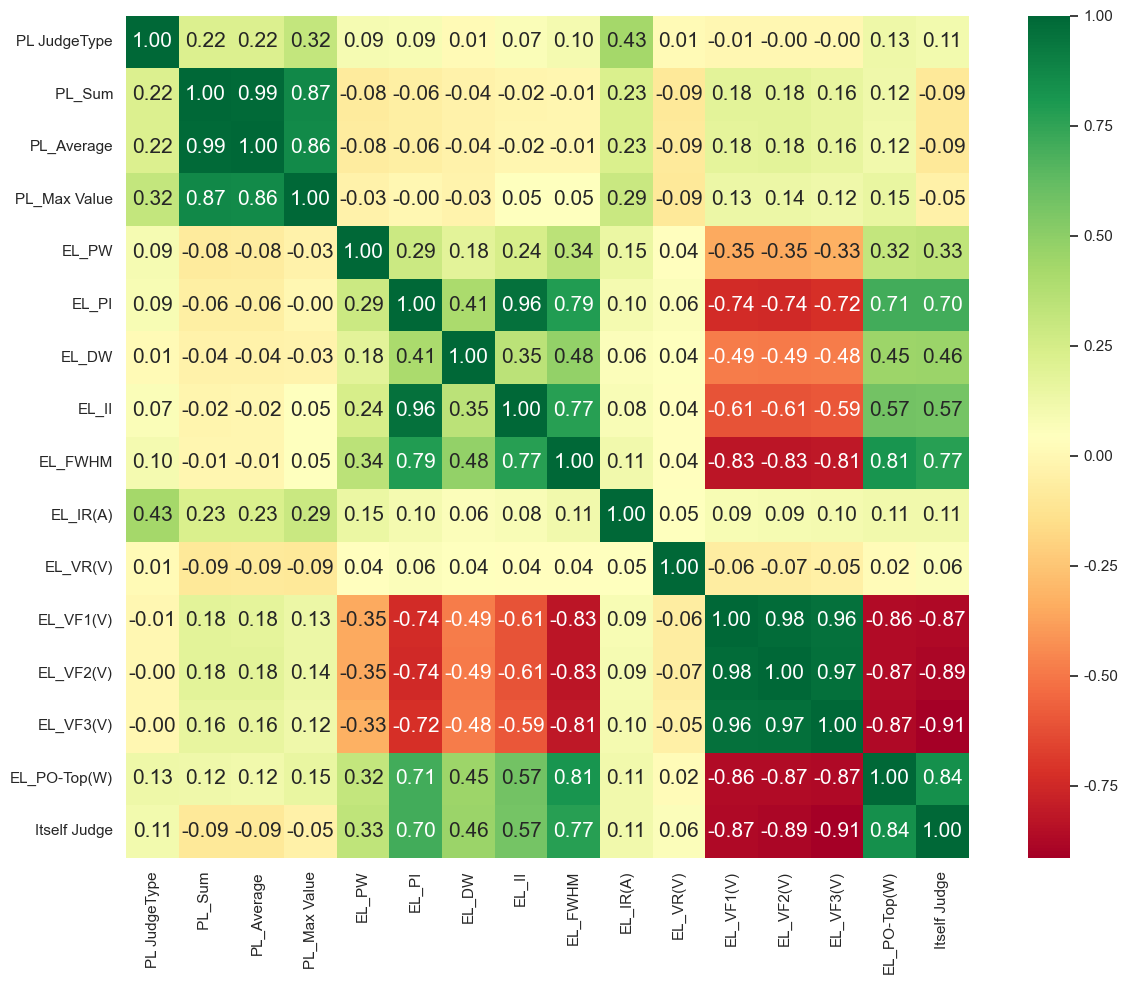

In [39]:
#각 Column별 상관관계 시각화
cols = ['PL JudgeType',' PL_Sum','PL_Average','PL_Max Value','EL_PW','EL_PI','EL_DW','EL_II','EL_FWHM','EL_IR(A)','EL_VR(V)','EL_VF1(V)','EL_VF2(V)','EL_VF3(V)','EL_PO-Top(W)','Itself Judge']
corr = df_1[cols].corr(method = 'pearson') # 피어슨 상관계수 메소드를 사용하여 상관관계 설정

corr.values
column_names = ['PL JudgeType',' PL_Sum','PL_Average','PL_Max Value','EL_PW','EL_PI','EL_DW','EL_II','EL_FWHM','EL_IR(A)','EL_VR(V)','EL_VF1(V)','EL_VF2(V)','EL_VF3(V)','EL_PO-Top(W)','Itself Judge']
sns.set(font_scale=1,rc={"axes.unicode_minus":False})
plt.figure(figsize = (13,10))
hm = sns.heatmap(corr.values, #데이터
            cbar=True, #오른쪽 컬러 막대 출력 여부
            annot=True, #차트에 숫자를 보여줄 것인지 여부
            square=True, #차트를 정사각형으로 할 것인지
            fmt='.2f', #숫자의 출력 소수점 자리 개수 조절
            annot_kws={'size': 15}, #숫자 출력 시 숫자 크기 조절
            yticklabels=column_names, #y축에 컬럼명 출력
            xticklabels=column_names, #x축에 컬럼명 출력
            cmap="RdYlGn") 
plt.tight_layout()
plt.show()

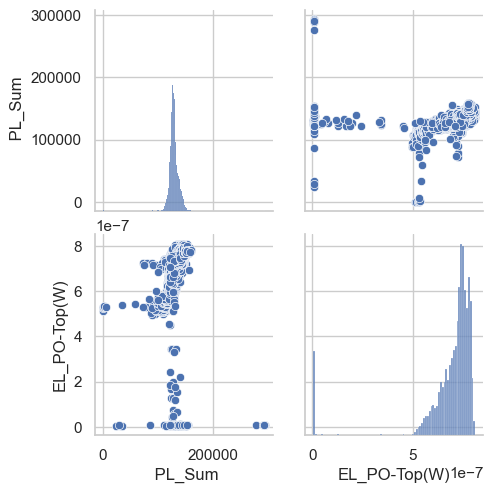

In [37]:
sns.set(style='whitegrid') 
sns.pairplot(df_1[[' PL_Sum','EL_PO-Top(W)']]) # 'PL_Sum'과 'EL_P0-Top(W)' 사이의 상관관계 그래프로 나타내기
plt.show()